# Clase 23 - Interpretabilidad 🧐

- MDS7202: Laboratorio de Programación Científica para Ciencia de Datos
- Profesor: Ignacio Meza De la jara

![ML ops](https://camo.githubusercontent.com/4724bc1636a3fee34f87a1fac991fc4ccd270c0a3a510db04394f90b05d065eb/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f4d4453373230322f4d4453373230322f6d61696e2f7265637572736f732f323032332d30312f31332d4544412f6d65746f646f6c6f6769612e706e67)

Objetivos:

- Comprender que es la interpretabilidad en machine learning.
- Distinguir que es un modelo agnostico global y como usar dos de ellos en python.

Hasta ahora solamente hemos desarrollado modelos y no nos hemos preocupado del impacto que podrían tener estos sobre la población donde deseamos aplicarlo. Esto lo hemos visto utilizando un proceso que solamente considera mejoras en la predictibilidad del modelo, sin embargo estamos dejando de lado un punto relevante que es la interpretabilidad.

Según Miller en su trabajo "Explanation in artificial intelligence" (2017) señala que la interpretabilidad en machine learning es :

>Interpretability is the degree to which a human can understand the cause of a decision.

		❓Pregunta: ¿Será necesario interpretar y/o obtener una explicación de las predicciones?

		❓Pregunta: ¿Por qué creen que es necesaria la interpretabilidad de un modelo?

		❓Pregunta: ¿Por qué no creemos solamente en el modelo que creamos nosotros?

El problema con los modelos es que estos solamente responden el "¿Qué?", enfocando solamente el análisis en lo que sale del modelo.  De esta forma, muchas veces solamente nos preocupamos de comprobar una simple métrica como accuracy, f1-score u otra, lo que en verdad es una descripción incompleta del mundo real, ya que una respuesta correcta resuelve solo parte del problema.

❓Pregunta: ¿Qué sucede si nos damos cuenta que las variables mas relevantes de nuestro problema no tienen sentido teorico?

Por lo general evitamos responder el "¿Por qué?", pregunta que busca una explicación de la salida obtenida por nuestro modelos y que su respuesta nos puede llevar a aprender mas del problema que intentamos resolver. 

		❓Pregunta: ¿Comó podría ayudarnos responder esta pregunta en un problema de machine learning?

Si pensamos en nosotros como raza humana, gracias a nuestra curiosidad y aprendizaje hemos sido capaces de aprender y esto a sido a traves de la busqueda del ¿por qué?. Mentalmente poseemos un modelo que se actualiza según las experiencias que tenemos, donde la actualización del conocimiento se obtiene cuando nos damos cuenta del ¿por qué? pasan las cosas. Un ejemplo es el hombre primitivo, quien logra identificar que plantas son venenosas o no a traves del impacto que poseen en la comunidad.

El aprendizaje está relacionado con la búsqueda de significados en el mundo. Por ello, intentaremos armonizar las contradicciones e inconsistencias entre los elementos de la estructura de conocimientos que manejamos.

❓Pregunta: ¿Cuando se tiene una buena interpretación?

## Explicaciones amigables para los humanos

Según Miller una explicación amigable para los humanos debe contener los siguientes 7 puntos:
1. Son contrastivas.
2. Son selectivas.
3. Son sociales.
4. Se centran en lo anormal.
5. Son confiables.
6. Son consistentes.
7. Son generales y probables.


## Impacto de una buena interpretación en Machine Learning

Por esto, la interpretabilidad de nuestros modelos de machine learning nos entregarán un mejor conocimiento de nuestro problema, transformando nuestro modelo en la fuente de conocimiento. En concreto, a continuación se señalan algunos de los puntos más importantes que nos entrega la interpretabilidad en machine learning:

- Predicciones seguras: Al momento de desarrollar un modelo capaz de manejar un automóvil automáticamente sería esperable que las predicciones/clasificaciones del modelo interno sean seguras para el usuario. Por esto, la comprensión del ¿cómo? Está tomando decisiones mi modelo es crucial, ya que de lo contrario podría tener consecuencias catastróficas.

        ❓Pregunta: ¿Qué sucede si mi modelo de conducción automática reconoce solamente personas adultas?

- Detección de sesgo: La interpretabilidad permite reconocer sesgos en nuestros modelos, descubriendo que nuestro modelo está cargado a un cierto tipo de población y excluyendo a un grupo minoritario.
  
        ❓Pregunta: Imaginemos el caso en el que creamos un modelo de préstamos bancarios, al momento de lanzarlo a producción este solamente entrega créditos a hombres blancos, ¿es un problema esto?


- Aceptación social y manejo de interacciones sociales: La integración de los modelos de Machine Learning en el día a día exige el crecimiento de confianza en ellos.

		❓Pregunta: ¿Por qué este punto es relevante?

- Debugging: La comprensión de un modelo permite un mejor debugging, ya que sabremos cómo las componentes impactan en las salidas de él.

¿Cuando no es necesaria la interpretabilidad?

Si bien resulta interesante y beneficiosa la interpretabilidad en los modelos, en algunos casos/problemas no es necesaria la implementación de un proceso de interpretabilidad.
1. La interpretabilidad no es necesaria cuando un proyecto de machine learning no posee un impacto significativo.
2. Si el problema está bien estudiado, la interpretabilidad deja de ser relevante.
3. Cuando el algoritmo de machine learning permite a las personas manipular el sistema.

## Modelos Intrinsecos
Se refiere a todos los modelos que son considerados interpretables debido a la estructura simple que poseen. 


In [1]:
from sklearn.datasets import fetch_openml

bikes = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True, parser="pandas")
# Make an explicit copy to avoid "SettingWithCopyWarning" from pandas
X, y = bikes.data.copy(), bikes.target

In [2]:
X["weather"].value_counts()

clear         11413
misty          4544
rain           1419
heavy_rain        3
Name: weather, dtype: int64

In [3]:
mask_training = X["year"] == 0.0
X = X.drop(columns=["year"])
X_train, y_train = X[mask_training], y[mask_training]
X_test, y_test = X[~mask_training], y[~mask_training]

In [4]:
numerical_features = [
    "temp",
    "feel_temp",
    "humidity",
    "windspeed",
]
categorical_features = X_train.columns.drop(numerical_features)

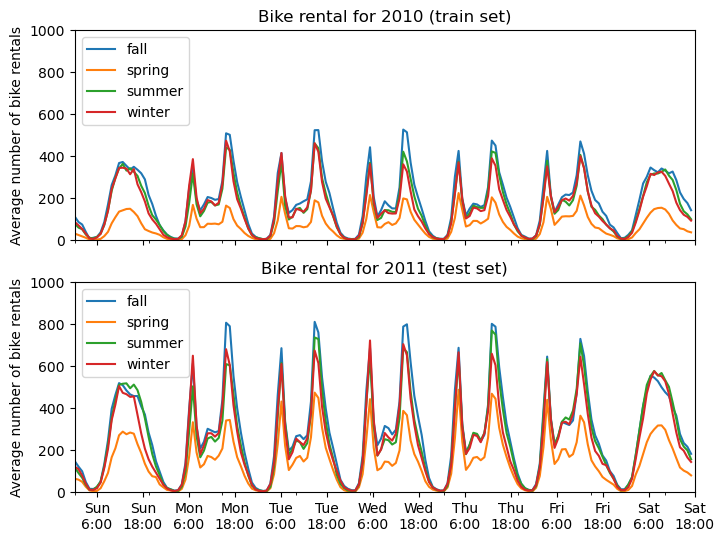

In [5]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

days = ("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")
hours = tuple(range(24))
xticklabels = [f"{day}\n{hour}:00" for day, hour in product(days, hours)]
xtick_start, xtick_period = 6, 12

fig, axs = plt.subplots(nrows=2, figsize=(8, 6), sharey=True, sharex=True)
average_bike_rentals = bikes.frame.groupby(["year", "season", "weekday", "hour"]).mean(
    numeric_only=True
)["count"]
for ax, (idx, df) in zip(axs, average_bike_rentals.groupby("year")):
    df.groupby("season").plot(ax=ax, legend=True)

    # decorate the plot
    ax.set_xticks(
        np.linspace(
            start=xtick_start,
            stop=len(xticklabels),
            num=len(xticklabels) // xtick_period,
        )
    )
    ax.set_xticklabels(xticklabels[xtick_start::xtick_period])
    ax.set_xlabel("")
    ax.set_ylabel("Average number of bike rentals")
    ax.set_title(
        f"Bike rental for {'2010 (train set)' if idx == 0.0 else '2011 (test set)'}"
    )
    ax.set_ylim(0, 1_000)
    ax.set_xlim(0, len(xticklabels))
    ax.legend(loc=2)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

hgbdt_preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(), categorical_features),
        ("num", "passthrough", numerical_features),
    ],
    sparse_threshold=1,
    verbose_feature_names_out=False,
).set_output(transform="pandas")
hgbdt_preprocessor

ColumnTransformer(sparse_threshold=1,
                  transformers=[('cat', OrdinalEncoder(),
                                 Index(['season', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather'],
      dtype='object')),
                                ('num', 'passthrough',
                                 ['temp', 'feel_temp', 'humidity',
                                  'windspeed'])],
                  verbose_feature_names_out=False)

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
hgbdt_model = make_pipeline(
    hgbdt_preprocessor,
    HistGradientBoostingRegressor(
        categorical_features=categorical_features, random_state=0
    ),
)
hgbdt_model.fit(X_train, y_train)
print(f"Test R2 score: {hgbdt_model.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
Test R2 score: 0.64


In [16]:
common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

features_info = {
    # features of interest
    "features": ["temp", "humidity", "windspeed", "season", "weather", "hour"],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": categorical_features,
}

Computing partial dependence plots...


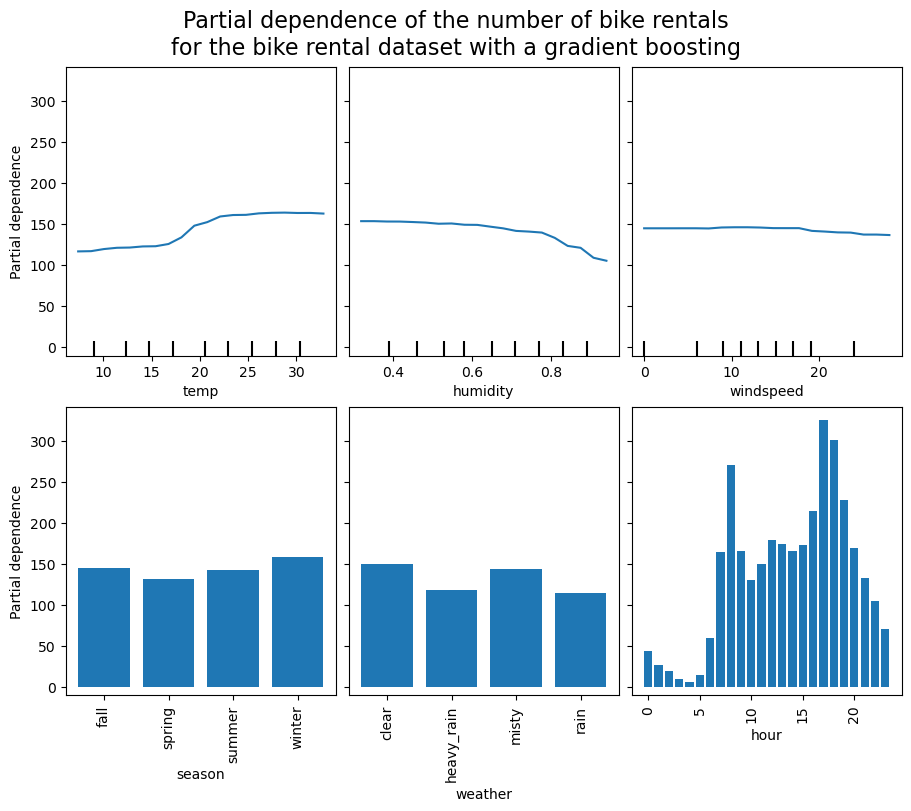

In [17]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay


print("Computing partial dependence plots...")
_, ax = plt.subplots(ncols=3, nrows=2, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    hgbdt_model,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle(
    "Partial dependence of the number of bike rentals\n"
    "for the bike rental dataset with a gradient boosting",
    fontsize=16,
)

Computing partial dependence plots and individual conditional expectation...


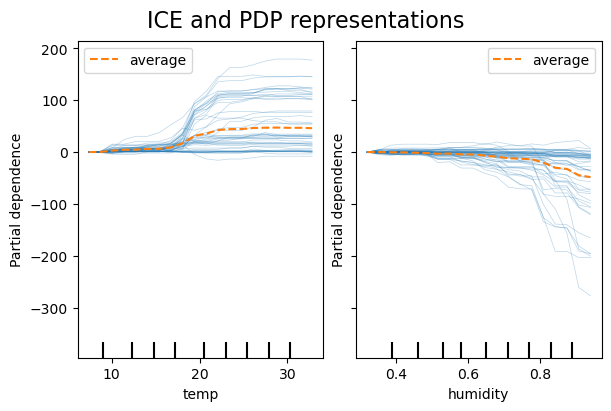

In [19]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(ncols=2, figsize=(6, 4), sharey=True, constrained_layout=True)

features_info = {
    "features": ["temp", "humidity"],
    "kind": "both",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    hgbdt_model,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle("ICE and PDP representations", fontsize=16)

Computing partial dependence plots...


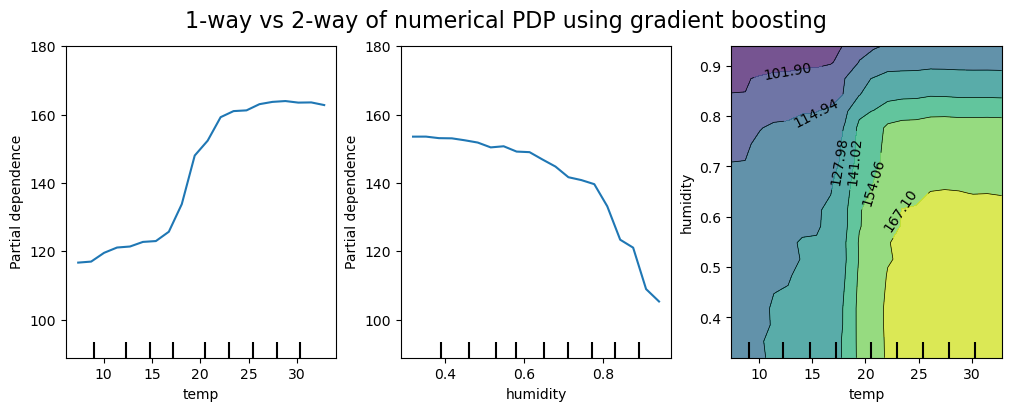

In [21]:
print("Computing partial dependence plots...")
features_info = {
    "features": ["temp", "humidity", ("temp", "humidity")],
    "kind": "average",
}
_, ax = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    hgbdt_model,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle(
    "1-way vs 2-way of numerical PDP using gradient boosting", fontsize=16
)

### Permutation Feature Importance

Introducido por Breiman en 2001, el método de permutación es uno de los métodos mas sencillos y tiene como objetivo medir el incremento del error (Feature Importance) en la predicción del modelo después de haber permutado valores en las features. 

Punto importante: Este método se debe aplicar sobre el conjunto de prueba, de lo contrario podríamos visualizar el aporte solamente en un caso favorable.

**¿Cómo funciona este algoritmo?**

Input: Modelo entrenado 𝑓, matriz de características 𝑋, vector objetivo 𝑦, medida de error 𝐿(𝑦,𝑓). minici (2018):

1. Estimar el error del modelo original $\hat{𝑒}_{orig}= 𝐿(𝑦, \hat{f}(𝑋))$ (por ejemplo, error cuadrático medio).
2. Para cada característica 𝑗 ∈ {1, ..., 𝑝}, hacer lo siguiente: 
	1. Generar una matriz de características permutadas $𝑋_{𝑝𝑒𝑟𝑚}$ permutando la característica 𝑗 en los datos 𝑋. Esto rompe la asociación entre la característica 𝑗 y el resultado verdadero 𝑦. 
	2. Estimar el error $𝑒 = 𝐿(𝑌 , \hat{f} (𝑋_{perm} ))$ basado en las predicciones del conjunto de datos permutado. 
	3. Calcular la importancia de la característica permutada como el cociente $𝐹 𝐼_j = 𝑒_{perm}/𝑒_{orig}$ o $𝐹 𝐼_j = 𝑒_{perm}-𝑒_{orig}$ 
3. Ordenar las características en orden descendente según la importancia permutada.

#### Ventajas

- Fácil interpretación.
- Alta compresión de interpretabilidad global.
- Comparable con diferentes modelos.
- Toma en cuenta las interacciones.
- No necesita re-entrenar el modelo.

#### Desventajas

- Enlazado al error del modelo.
- Necesitas acceso a la gold label.
- Si las features están correlacionadas puede generar sesgos por entradas poco realistas.
- Añadir una feature correlacionada puede decrecer la importancia de una feature asociada al separar la importancia en las dos features.


#### Uso en Python

Para utilizar este método en python solamente se debe importar desde el modulo de `inspection` a `permutation_importance`

In [23]:
from sklearn.inspection import permutation_importance
import numpy as np

In [51]:
clf = hgbdt_model
data = bikes
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

Revisamos que contiene result:

In [52]:
result

{'importances_mean': array([0.01717857, 0.03882135, 0.97757389, 0.00233549, 0.05003656,
        0.11913041, 0.01366042, 0.06888885, 0.00670683, 0.05412855,
        0.00215442]),
 'importances_std': array([0.00087285, 0.00214499, 0.00833222, 0.00018382, 0.00212987,
        0.00442524, 0.00109329, 0.00354518, 0.00074087, 0.00205383,
        0.0002877 ]),
 'importances': array([[0.0175882 , 0.01542511, 0.01660542, 0.01769963, 0.01723527,
         0.01732152, 0.01837158, 0.015934  , 0.01777181, 0.01783317],
        [0.03809344, 0.0371569 , 0.04212375, 0.03894465, 0.03897207,
         0.04002519, 0.03533728, 0.03581801, 0.04025678, 0.04148542],
        [0.97538025, 0.97731765, 0.9875748 , 0.96759199, 0.97309273,
         0.97393803, 0.96427998, 0.97924876, 0.9847074 , 0.99260734],
        [0.00240067, 0.00223759, 0.00264537, 0.00233849, 0.00248298,
         0.0025253 , 0.00226271, 0.00235449, 0.00200012, 0.0021072 ],
        [0.05125388, 0.04639269, 0.05264798, 0.04930715, 0.04751969,
     

Con la información de los errores obtenidas, realizamos un gráfico de boxplot para visualizar la importancia que poseen las variables:

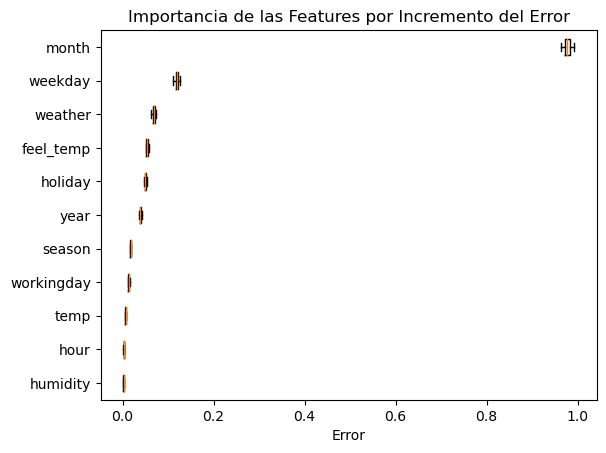

In [53]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(data['feature_names'])[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()